In [ ]:
import csv
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from nltk.classify import SklearnClassifier
from random import shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
filename = "/content/drive/MyDrive/INF6243_Hiver2024/Devoirs/amazon_reviews.txt"

In [ ]:
# load data from a file and append it to the rawData
def loadData(path, Text=None):
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        next(reader)
        for line in reader:
            (Id, Text, Label) = parseReview(line)
            rawData.append((Id, Text, Label))
            preprocessedData.append((Id, preProcess(Text), Label))

def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (_, Text, Label) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Text)),Label))
    for (_, Text, Label) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Text)),Label))

In [ ]:
def plot_graph(values):
  metrics = ['Accuracy', 'Precision', 'Recall', 'Fscore']
  colors = ['red', 'green', 'blue', 'orange']
  plt.bar(metrics, values, color=colors)
  plt.xlabel('Metrics')
  plt.ylabel('Values')
  plt.title('Bar Chart')
  plt.show()

In [ ]:
# QUESTION 1

# Convert line from input file into an id/text/label tuple
def parseReview(reviewLine):
    # Should return a triple of an integer, a string containing the review, and a string indicating the label
    s=""
    if reviewLine[1]=="__label1__":
        s = "fake"
    else:
        s = "real"
    return (reviewLine[0], reviewLine[8], s)


In [ ]:
# TEXT PREPROCESSING AND FEATURE VECTORIZATION

# Input: a string of one review
def preProcess(text):
    # Should return a list of tokens
    return word_tokenize(text)

In [ ]:
featureDict = {} # A global dictionary of features

def toFeatureVector(tokens):
    localDict = {}
    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1

        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1

    return localDict

In [ ]:
# TRAINING AND VALIDATING OUR CLASSIFIER
def trainClassifier(trainData):
    print("Training Classifier...")
    #pipeline =  Pipeline([('MLP', MLPClassifier(hidden_layer_sizes=(10,1),
    #                   max_iter = 100,activation = 'relu',
    #                   solver = 'adam'))])
    pipeline =  Pipeline([('MLP', MLPClassifier(hidden_layer_sizes=(30,)))])
    return SklearnClassifier(pipeline).train(trainData)

In [ ]:
# QUESTION 3

def crossValidate(dataset, folds):
    shuffle(dataset)
    cv_results = []
    foldSize = int(len(dataset)/folds)
    for i in range(0,len(dataset),foldSize):
        classifier = trainClassifier(dataset[:i]+dataset[foldSize+i:])
        y_pred = predictLabels(dataset[i:i+foldSize],classifier)
        a = accuracy_score(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred)
        (p,r,f,_) = precision_recall_fscore_support(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred, average ='macro')
        #print(a,p,r,f)
        cv_results.append((a,p,r,f))
    cv_results = (np.mean(np.array(cv_results),axis=0))
    return cv_results

In [ ]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predictLabels(reviewSamples, classifier):
    return classifier.classify_many(map(lambda t: t[0], reviewSamples))

def predictLabel(reviewSample, classifier):
    return classifier.classify(toFeatureVector(preProcess(reviewSample)))

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 21000 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 21000 rawData, 16800 trainData, 4200 testData
Training Samples: 
16800
Features: 
52965
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.60791667 0.60815916 0.60799686 0.60764384]


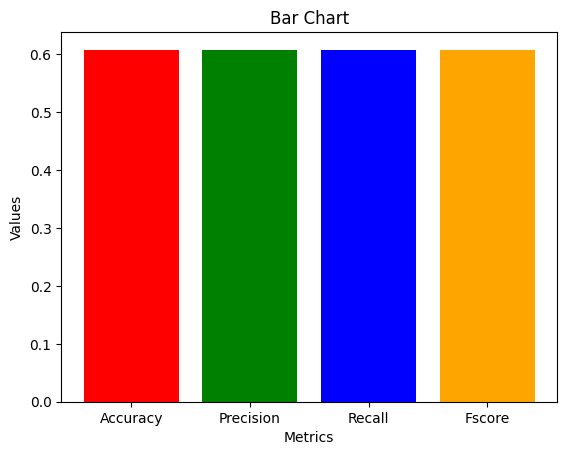

In [ ]:
# MAIN

# loading reviews
rawData = []          # the filtered data from the dataset file (should be 21000 samples)
preprocessedData = [] # the preprocessed reviews (just to see how your preprocessing is doing)
trainData = []        # the training data as a percentage of the total dataset (currently 80%, or 16800 samples)
testData = []         # the test data as a percentage of the total dataset (currently 20%, or 4200 samples)

# the output classes
fakeLabel = 'fake'
realLabel = 'real'

# references to the data files
reviewPath = filename

## Do the actual stuff
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing the dataset...",sep='\n')
loadData(reviewPath)
# We split the raw dataset into a set of training data and a set of test data (80/20)
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
validate = crossValidate(trainData, 10)
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", validate)
plot_graph(validate)

====== INCLUDING LEMMATIZATION,REMOVING STOP WORDS AND PUNCTUATIONS ======

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import string

In [ ]:
# TEXT PREPROCESSING AND FEATURE VECTORIZATION

table = str.maketrans({key: None for key in string.punctuation})

def preProcess(text):
    # Should return a list of tokens
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        if w not in stop_words:
            filtered_tokens.append(lemmatizer.lemmatize(w.lower()))
    return filtered_tokens

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 21000 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 21000 rawData, 16800 trainData, 4200 testData
Training Samples: 
16800
Features: 
73061
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.60619048 0.6063071  0.60618704 0.60600406]


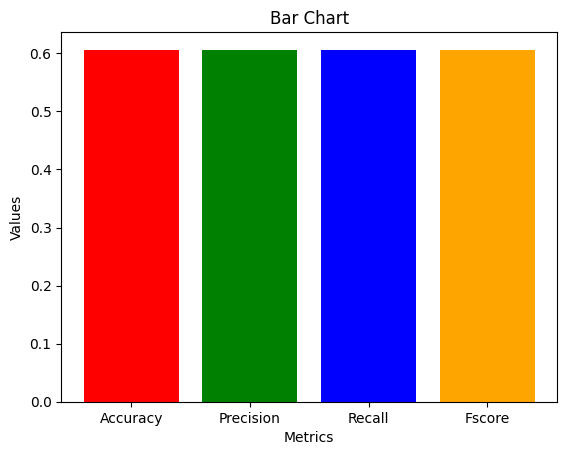

In [ ]:
# MAIN

# loading reviews
rawData = []          # the filtered data from the dataset file (should be 21000 samples)
preprocessedData = [] # the preprocessed reviews (just to see how your preprocessing is doing)
trainData = []        # the training data as a percentage of the total dataset (currently 80%, or 16800 samples)
testData = []         # the test data as a percentage of the total dataset (currently 20%, or 4200 samples)

# the output classes
fakeLabel = 'fake'
realLabel = 'real'

# references to the data files
reviewPath = filename

## Do the actual stuff
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing the dataset...",sep='\n')
loadData(reviewPath)
# We split the raw dataset into a set of training data and a set of test data (80/20)
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
validate = crossValidate(trainData, 10)
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", validate)
plot_graph(validate)

====== INTRODUCING THE BIGRAMS & TRYING DIFFERENT VALUES OF C IN LINEARSVC FUNCTION ======

In [ ]:
# TEXT PREPROCESSING AND FEATURE VECTORIZATION
# Input: a string of one review
table = str.maketrans({key: None for key in string.punctuation})
def preProcess(text):
    # Should return a list of tokens
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    lemmatized_tokens = []
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        if w not in stop_words:
            lemmatized_tokens.append(lemmatizer.lemmatize(w.lower()))
        filtered_tokens = [' '.join(l) for l in nltk.bigrams(lemmatized_tokens)] + lemmatized_tokens
    return filtered_tokens

In [ ]:
# TRAINING AND VALIDATING OUR CLASSIFIER
def trainClassifier(trainData):
    print("Training Classifier...")
    #pipeline =  Pipeline([('MLP', MLPClassifier(hidden_layer_sizes=(10,1),
    #                   max_iter = 100,activation = 'relu',
    #                   solver = 'adam'))])
    pipeline =  Pipeline([('MLP', MLPClassifier(hidden_layer_sizes=(30,)))])
    return SklearnClassifier(pipeline).train(trainData)

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 21000 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 21000 rawData, 16800 trainData, 4200 testData
Training Samples: 
16800
Features: 
512245
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.78261905 0.78325495 0.7826306  0.78242116]


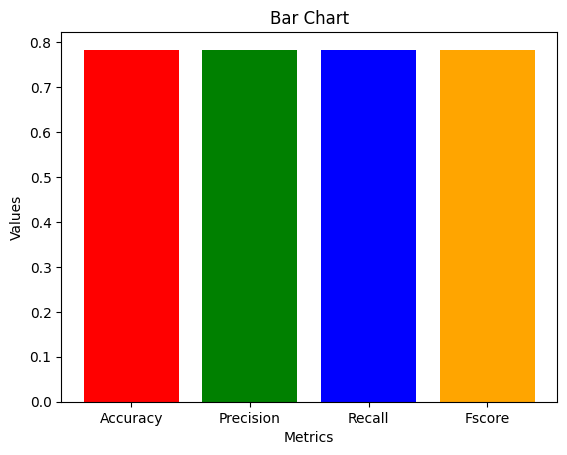

In [ ]:
# MAIN

# loading reviews
rawData = []          # the filtered data from the dataset file (should be 21000 samples)
preprocessedData = [] # the preprocessed reviews (just to see how your preprocessing is doing)
trainData = []        # the training data as a percentage of the total dataset (currently 80%, or 16800 samples)
testData = []         # the test data as a percentage of the total dataset (currently 20%, or 4200 samples)

# the output classes
fakeLabel = 'fake'
realLabel = 'real'

# references to the data files
reviewPath = filename

## Do the actual stuff
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing the dataset...",sep='\n')
loadData(reviewPath)
# We split the raw dataset into a set of training data and a set of test data (80/20)
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
validate = crossValidate(trainData, 10)
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", validate)
plot_graph(validate)

====== TAKING EXTRA FEATURES (RATING, VERIFIED PURCHASE, PRODUCT CATEGORY) ======

In [ ]:
# load data from a file and append it to the rawData
def loadData(path, Text=None):
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        next(reader)
        for line in reader:
            (Id, Rating, verified_Purchase, product_Category, Text, Label) = parseReview(line)
            rawData.append((Id, Rating, verified_Purchase, product_Category, Text, Label))
            #preprocessedData.append((Id, preProcess(Text), Label))

def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (_, Rating, verified_Purchase, product_Category, Text, Label) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(Rating, verified_Purchase, product_Category, preProcess(Text)),Label))
    for (_, Rating, verified_Purchase, product_Category, Text, Label) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(Rating, verified_Purchase, product_Category, preProcess(Text)),Label))

In [ ]:
# QUESTION 1

# Convert line from input file into an id/text/label tuple
def parseReview(reviewLine):
    # Should return a triple of an integer, a string containing the review, and a string indicating the label
    s=""
    if reviewLine[1]=="__label1__":
        s = "fake"
    else:
        s = "real"
    return (reviewLine[0], reviewLine[2], reviewLine[3],reviewLine[4], reviewLine[8], s)


In [ ]:
# TEXT PREPROCESSING AND FEATURE VECTORIZATION
# Input: a string of one review
table = str.maketrans({key: None for key in string.punctuation})
def preProcess(text):
    # Should return a list of tokens
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    lemmatized_tokens = []
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        if w not in stop_words:
            lemmatized_tokens.append(lemmatizer.lemmatize(w.lower()))
        filtered_tokens = [' '.join(l) for l in nltk.bigrams(lemmatized_tokens)] + lemmatized_tokens
    return filtered_tokens

In [ ]:
featureDict = {} # A global dictionary of features

def toFeatureVector(Rating, verified_Purchase, product_Category, tokens):
    localDict = {}

#Rating

    #print(Rating)
    featureDict["R"] = 1
    localDict["R"] = Rating

#Verified_Purchase

    featureDict["VP"] = 1

    if verified_Purchase == "N":
        localDict["VP"] = 0
    else:
        localDict["VP"] = 1

#Product_Category


    if product_Category not in featureDict:
        featureDict[product_Category] = 1
    else:
        featureDict[product_Category] = +1

    if product_Category not in localDict:
        localDict[product_Category] = 1
    else:
        localDict[product_Category] = +1


#Text

    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1

        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1

    return localDict

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 21000 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 21000 rawData, 16800 trainData, 4200 testData
Training Samples: 
16800
Features: 
512245
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.72547619 0.72577676 0.72554036 0.72532586]


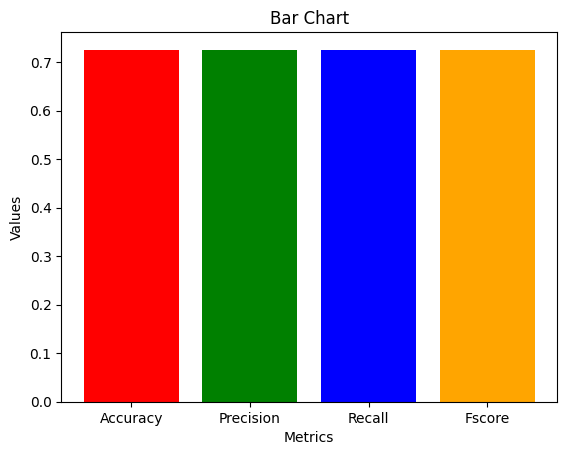

In [ ]:
# MAIN

# loading reviews
rawData = []          # the filtered data from the dataset file (should be 21000 samples)
preprocessedData = [] # the preprocessed reviews (just to see how your preprocessing is doing)
trainData = []        # the training data as a percentage of the total dataset (currently 80%, or 16800 samples)
testData = []         # the test data as a percentage of the total dataset (currently 20%, or 4200 samples)

# the output classes
fakeLabel = 'fake'
realLabel = 'real'

# references to the data files
reviewPath = filename

## Do the actual stuff
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing the dataset...",sep='\n')
loadData(reviewPath)
# We split the raw dataset into a set of training data and a set of test data (80/20)
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
validate = crossValidate(trainData, 10)
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", validate)
plot_graph(validate)

In [ ]:
#  TEST DATA
classifier = trainClassifier(trainData)
predictions = predictLabels(testData, classifier)
true_labels = list(map(lambda d: d[1], testData))
a = accuracy_score(true_labels, predictions)
p, r, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print("accuracy: ", a)
print("Precision: ", p)
print("Recall: ", a)
print("f1-score: ", f1)


Training Classifier...
accuracy:  0.7066666666666667
Precision:  0.7072561954002496
Recall:  0.7066666666666667
f1-score:  0.7064579256360078
